# Using Custom Callbacks When Running TARDIS

In [7]:
import warnings
warnings.filterwarnings('ignore')

from tardis import run_tardis
import tardis

tardis.logger.setLevel(0)
tardis.logging.captureWarnings(False)

The command `run_tardis` allows users to provide a set of callbacks to the simulation.  These callbacks are called at the end of each iteration.  This example will show you how to create a custom callback and run a model with TARDIS.  As an example, we create a custom callback that prints out some basic information about our model at every iteration.  Specifically, we'll print out a table of the inner velocities of each shell as well as the radiative temperature of each shell.  The first thing to note is that the callback function must have the simulation object as the first argument.  This grants the user access to the state of the simulation at each iteration.

In [2]:
def display_table(sim):
    '''Display a table of velocities and 
    radiative temperatures at each iteration
    '''
    
    # We have direct access to the attributes of the simulation
    columns = zip(sim.model.v_inner[::5].to('km/s'), 
                  sim.model.t_rad[::5].to('K'))
    print("Iteration:", sim.iterations_executed)
    print("  {:<15}    {:<15}".format('v_inner', 't_rad'))
    format_string = "  {0.value:<8.2f} {0.unit:<6s}\
    {1.value:<8.2f} {1.unit:<6s}"
    for velocity, temperature in columns:
        print(format_string.format(velocity, temperature))


Now we give the callback to `run_tardis`.  `run_tardis` offers the keyword argument `simulation_callbacks` which takes a list of lists containing the callback as well as any optional arguments you wish to include with your callback.  For this example our function requires no extra arguments and we only have a single callback, so we give `run_tardis` a 2D list containing the callback as its only element.

In [3]:
sim = run_tardis('tardis_example.yml', 
                 simulation_callbacks=[[display_table]])

Iteration: 1
  v_inner            t_rad          
  11000.00 km / s    10171.21 K     
  13250.00 km / s    10306.11 K     
  15500.00 km / s    10174.38 K     
  17750.00 km / s    9910.44  K     
Iteration: 2
  v_inner            t_rad          
  11000.00 km / s    11518.52 K     
  13250.00 km / s    11554.41 K     
  15500.00 km / s    11373.57 K     
  17750.00 km / s    11040.79 K     
Iteration: 3
  v_inner            t_rad          
  11000.00 km / s    10501.13 K     
  13250.00 km / s    10869.94 K     
  15500.00 km / s    10558.27 K     
  17750.00 km / s    10185.65 K     
Iteration: 4
  v_inner            t_rad          
  11000.00 km / s    11527.01 K     
  13250.00 km / s    11706.14 K     
  15500.00 km / s    11444.21 K     
  17750.00 km / s    11085.86 K     
Iteration: 5
  v_inner            t_rad          
  11000.00 km / s    10659.38 K     
  13250.00 km / s    11038.24 K     
  15500.00 km / s    10790.70 K     
  17750.00 km / s    10450.67 K     
Iteration:

## Running Callbacks with Extra Arguments

The callbacks provided to `run_tardis` can also take extra arguments.  As an example, we'll make a callback that appends the value of the radiative temperature at each iteration to a list so we can watch how the model converges.  The callback will take a list we want to append to as an argument.  We'll send both this new callback and our original `display_table` callback to `run_tardis` as an example of using multiple callbacks at once.

In [4]:
def append_t_rad_to_table(sim, table):
    '''append the array for the radiative temperature
    at each iteration to a given table'''
    
    table.append(sim.model.t_rad.copy())

In order to add our new callback, we just create another entry in our list of callbacks.  Since `append_t_rad_to_table` takes an extra argument, we will provide that argument in the inner list containing the callback.

In [5]:
t_rad_table = [] # list to store t_rad at each iteration

callbacks = [[display_table], 
             [append_t_rad_to_table, t_rad_table]]
sim = run_tardis('tardis_example.yml', 
                 simulation_callbacks=callbacks)

Iteration: 1
  v_inner            t_rad          
  11000.00 km / s    10171.21 K     
  13250.00 km / s    10306.11 K     
  15500.00 km / s    10174.38 K     
  17750.00 km / s    9910.44  K     
Iteration: 2
  v_inner            t_rad          
  11000.00 km / s    11518.52 K     
  13250.00 km / s    11554.41 K     
  15500.00 km / s    11373.57 K     
  17750.00 km / s    11040.79 K     
Iteration: 3
  v_inner            t_rad          
  11000.00 km / s    10501.13 K     
  13250.00 km / s    10869.94 K     
  15500.00 km / s    10558.27 K     
  17750.00 km / s    10185.65 K     
Iteration: 4
  v_inner            t_rad          
  11000.00 km / s    11527.01 K     
  13250.00 km / s    11706.14 K     
  15500.00 km / s    11444.21 K     
  17750.00 km / s    11085.86 K     
Iteration: 5
  v_inner            t_rad          
  11000.00 km / s    10659.38 K     
  13250.00 km / s    11038.24 K     
  15500.00 km / s    10790.70 K     
  17750.00 km / s    10450.67 K     
Iteration:

Now we can look at the way the radiative temperature changes in each shell every iteration.

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


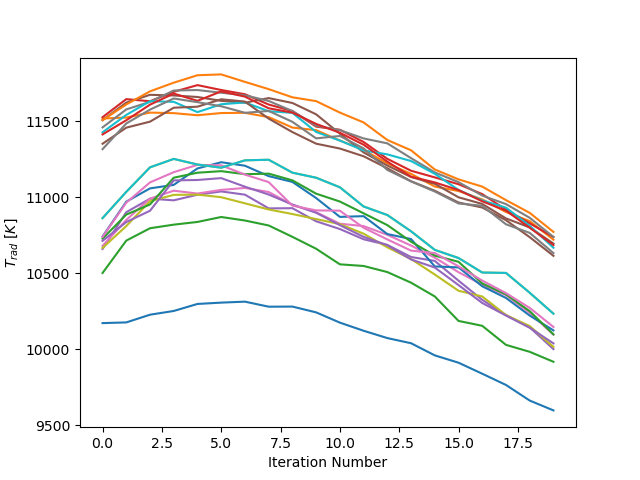

Text(0.5, 0, 'Iteration Number')

In [6]:
%pylab notebook
for t_rad in t_rad_table:
    plot(t_rad)
ylabel(r'$T_{rad}\ [K]$')
xlabel('Iteration Number')